In [1]:
import numpy as np
import pandas as pd
import os
from matplotlib import pyplot as plt

In [2]:
BASE_PATH = os.path.join(os.getcwd(), os.pardir)
DATA_PATH = os.path.join(BASE_PATH, 'data')

In [3]:
missing_vals = {}
outlier_count = {}

In [4]:
train_df = pd.read_json(os.path.join(DATA_PATH, 'train.json.zip'))

In [5]:
train_df.head()

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
6,1.0,2,b8e75fc949a6cd8225b455648a951712,2016-06-01 05:44:33,BRAND NEW GUT RENOVATED TRUE 2 BEDROOMFind you...,East 44th,"[Doorman, Elevator, Laundry in Building, Dishw...",40.7513,7092344,-73.9722,955db33477af4f40004820b4aed804a0,[https://photos.renthop.com/2/7092344_7663c19a...,3800,230 East 44th,low
9,1.0,2,cd759a988b8f23924b5a2058d5ab2b49,2016-06-14 15:19:59,**FLEX 2 BEDROOM WITH FULL PRESSURIZED WALL**L...,East 56th Street,"[Doorman, Elevator, Laundry in Building, Laund...",40.7575,7158677,-73.9625,c8b10a317b766204f08e613cef4ce7a0,[https://photos.renthop.com/2/7158677_c897a134...,3495,405 East 56th Street,medium
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue,medium
15,1.0,0,bfb9405149bfff42a92980b594c28234,2016-06-28 03:50:23,Over-sized Studio w abundant closets. Availabl...,East 34th Street,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7439,7225292,-73.9743,2c3b41f588fbb5234d8a1e885a436cfa,[https://photos.renthop.com/2/7225292_901f1984...,2795,340 East 34th Street,low


# Identifying outliers & missing values
## Price

We wish to determine how many listings in the training set are missing price data.

Note that the listing consists entirely of apartment rentals (i.e. the properties themselves are not for sale, and houses/townhouses are excluded).

In [6]:
missing_price = len(train_df[train_df.astype(str)['price'].isnull()])

missing_price

0

### Price Boxplot

In [7]:
price = train_df[['price']]

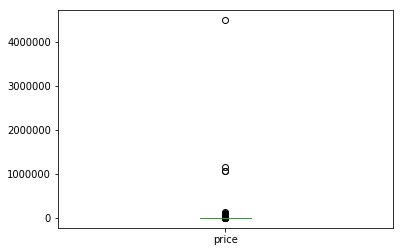

In [8]:
price.plot(kind='box')

### Outlier investigation (high values)

As seen above, there appear to be a few outliers. Most prices are less than \\$500000, which is expected given these are rentals. There are a few outliers, a few around \\$1 million, and one well above \\$4 million. We decide to investigate these entries in more detail.

In [9]:
train_df[(train_df['price'] > 500000)] 

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
12168,1.0,2,5d3525a5085445e7fcd64a53aac3cb0a,2016-06-24 05:02:58,,West 116th Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",40.8011,7208794,-73.9480,d1737922fe92ccb0dc37ba85589e6415,[],1150000,40 West 116th Street,low
32611,1.0,2,cd25bbea2af848ebe9821da820b725da,2016-06-24 05:02:11,,Hudson Street,"[Doorman, Elevator, Cats Allowed, Dogs Allowed...",40.7299,7208764,-74.0071,d1737922fe92ccb0dc37ba85589e6415,[],4490000,421 Hudson Street,low
55437,1.0,1,37385c8a58176b529964083315c28e32,2016-05-14 05:21:28,,West 57th Street,"[Doorman, Cats Allowed, Dogs Allowed]",40.7676,7013217,-73.9844,8f5a9c893f6d602f4953fcc0b8e6e9b4,[],1070000,333 West 57th Street,low
57803,1.0,1,37385c8a58176b529964083315c28e32,2016-05-19 02:37:06,This 1 Bedroom apartment is located on a prime...,West 57th Street,"[Doorman, Elevator, Pre-War, Dogs Allowed, Cat...",40.7676,7036279,-73.9844,18133bc914e6faf6f8cc1bf29d66fc0d,[https://photos.renthop.com/2/7036279_924b52f0...,1070000,333 West 57th Street,low


All four apartments exceed \\$1 million. It is unclear why the values are so high. Perhaps they were meant to be listed as 'for sale', or the prices have typos. Alternatively, they are legitimate postings for exceptionally lavish apartments. However, this is unlikely because a renthop search for NYC in January 29, 2020 shows that the highest priced rental is only \\$50,000 per month. 

Thus, we go ahead with removing these four entries from our training set.

### Outlier investigation (low values)

Now let's consider the opposite issue of values being unusually low. Since it is difficult tell from the boxplot, we sort the values in increasing order and display the first few values.

In [10]:
train_df['price'].sort_values()

53144          43
87511          45
117339        401
113599        695
113552        695
           ...   
123877     135000
55437     1070000
57803     1070000
12168     1150000
32611     4490000
Name: price, Length: 49352, dtype: int64

There are two unusually low values in the training set: 43 and 45. Let's look at them in more detail.

In [11]:
train_df[train_df['price'] < 100]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
53144,1.0,0,64f8e51f01a36ab0cd55fe9de2381306,2016-05-24 05:24:56,<p><a website_redacted,Madison,"[Doorman, Elevator, High Speed Internet]",40.7120,7060255,-73.9971,29ebd2f6553fbe12706a006a97349dd6,[],43,60 Madison,low
87511,1.0,0,d992b617c630de9c7b903a54562682dc,2016-04-02 02:43:15,<p><a website_redacted,W 30th St.,[Elevator],40.7479,6813772,-73.9917,29ebd2f6553fbe12706a006a97349dd6,[https://photos.renthop.com/2/6813772_323b9438...,45,140 W 30th St.,low


The two entries look somewhat legitimate, other than the fact that the descriptions contain "website_redacted". However, because the rent values are unrealistically low for NYC, we must assume that the prices are erroneous. Because we do not know what the true price is, we remove these data points.

### Final outlier removal

Combining the four unusually expensive listings, and the two unusually cheap listings, we have a total of 6 outliers.

In [12]:
outlier_count['price'] = 6

Summarizing our investigation into unusually high and low listing prices, we have decided to retain listings between \\$100 and \\$1 million.

In [13]:
price_filtered = train_df[(train_df['price'] > 100) & (train_df['price'] < 1000000)]['price']

### Price distribution, after outlier removal

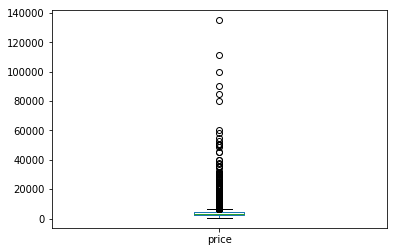

In [14]:
price_filtered.plot(kind='box')

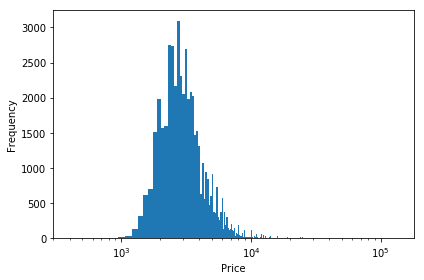

In [15]:
ax = price_filtered.plot.hist(bins=1000, logx=True)
ax.set_xlabel('Price')
plt.tight_layout()

From the histogram, it is evident that the vast majority of listings fall between \\$1,000 and \\$10,000. This is consistent with what we know about current-day NYE rental prices.

## Latitude/Longitude

We now focus our attention on looking for outliers in latitude and longitude. Like price, these features together may be informative in predicting interest level.

### Latitude

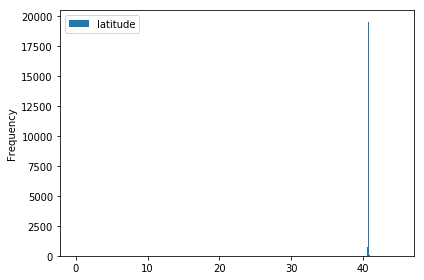

In [16]:
lats = train_df[['latitude']]

lats.plot.hist(bins=1000)
plt.tight_layout()

It appears that most of the data is around 41° N. This is consistent with the fact that NYC's actual coordinates are:

40.7128° N, 74.0060° W

But why does the histogram look so compressed? Notably, the x-axis ranges from 0 to 40. Perhaps there are some latitude values of 0...

In [17]:
missing_latitude = train_df[train_df['latitude'] == 0]

missing_latitude

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
2028,1.0,1,1490317c3a31185f0c8115f01d1acc5b,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn","[hardwood floors, own entrance, oak cabinets]",0.0,7087715,0.0,2290f91e45472ecaf0983c5af18098ce,[https://photos.renthop.com/2/7087715_mb_3517f...,1750,145 28 Street,low
37426,1.0,1,0,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,"[Reduced Fee, Cats Allowed]",0.0,7094527,0.0,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7094527_mb_7f196...,1725,Van Sicklen street,low
39134,1.0,2,a1b2bd0758c6f14be815e4d9382b8169,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy","[Views, No Fee, Duplex, Laundry in Unit, Cats ...",0.0,7174094,0.0,42cb18c3898c42b7512065e7d3e1e8bd,[https://photos.renthop.com/2/7174094_mb_e3c7e...,4395,219 E 28th,low
46941,1.0,2,8f837ada8d7ec5d251a369cd5909af7c,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,"[Laundry in Unit, Roof Deck, <null>]",0.0,6981091,0.0,b93b333035403fc090fb51372fb082f9,[https://photos.renthop.com/2/6981091_mb_efd73...,2950,1632 Madison Ave,medium
49884,1.0,2,ebb1fe8e32b8565f057a20abc495a2b5,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,"[Doorman, Fitness Center, Laundry in Unit, Cat...",0.0,6991620,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991620_mb_e7c05...,3619,41-42 24th St,low
63688,4.0,3,f389c8eb16e5d0c771615fb30f3cc9d6,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),"[Furnished, Laundry In Unit, Cats Allowed, Dog...",0.0,6997950,0.0,355ccd9223a7481c5d223d39b4e65e90,[https://photos.renthop.com/2/6997950_4ef02f8c...,16500,450 East 83rd Street,low
66197,1.0,1,4d7c804afea366c666731bee9c56919e,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,"[Doorman, Fitness Center, No Fee, Cats Allowed...",0.0,6991901,0.0,7d4f285c15b11c61bacfbf8e7a49252d,[https://photos.renthop.com/2/6991901_mb_e3232...,3600,247 west 87,low
69423,1.0,2,55ab81a4ccd5ea862fba344dc29f1463,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",0.0,7062134,0.0,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7062134_mb_9f18c...,3200,118 W 109th,low
70841,1.0,1,09e6efa1a58a3cd753aeee80bdf5ec36,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,"[No Fee, <null>]",0.0,6991613,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991613_mb_b7cec...,3495,246 Mott St,low
76934,1.0,2,cf6bfdca7e8ffdb3fa5f7d8d85005e4a,2016-05-26 14:19:38,"*Mgmt is accepting June 1st, 15th, July 1st, o...",106th/Central Park,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",0.0,7072634,0.0,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7072634_mb_90dba...,3200,21 W 106th,low


In [18]:
missing_latitude.shape[0]

12

There are 12 rentals with latitude 0. A latitude of 0 degrees may make sense if the city is directly above the Equator, but since we are talking about New York City, this is impossible. Therefore, a latitude of 0 implies missing latitude information.

Interestingly enough, all 12 rentals have longitude values of 0 as well. But let's look into longitude separately...

### Longitude

Since a latitude of 0 can exist in the data, we also search for longitude values of 0.

In [19]:
missing_longitude = train_df[train_df['longitude']==0]
missing_longitude

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
2028,1.0,1,1490317c3a31185f0c8115f01d1acc5b,2016-05-31 22:26:06,Gorgeous one bedroom in Sunset Park-Private en...,"Sunset Park, Brooklyn","[hardwood floors, own entrance, oak cabinets]",0.0,7087715,0.0,2290f91e45472ecaf0983c5af18098ce,[https://photos.renthop.com/2/7087715_mb_3517f...,1750,145 28 Street,low
37426,1.0,1,0,2016-06-01 19:59:46,Big 2 bedroom in clean and quite multi family ...,88 van Sicklen street,"[Reduced Fee, Cats Allowed]",0.0,7094527,0.0,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/7094527_mb_7f196...,1725,Van Sicklen street,low
39134,1.0,2,a1b2bd0758c6f14be815e4d9382b8169,2016-06-16 15:38:11,Flatiron Duplex!At the intersection of Flatiro...,"Flatiron, Kips Bay, Gramercy","[Views, No Fee, Duplex, Laundry in Unit, Cats ...",0.0,7174094,0.0,42cb18c3898c42b7512065e7d3e1e8bd,[https://photos.renthop.com/2/7174094_mb_e3c7e...,4395,219 E 28th,low
46941,1.0,2,8f837ada8d7ec5d251a369cd5909af7c,2016-05-07 08:15:32,Spacious and bright 2 bedroom fully renovated ...,Madison Ave,"[Laundry in Unit, Roof Deck, <null>]",0.0,6981091,0.0,b93b333035403fc090fb51372fb082f9,[https://photos.renthop.com/2/6981091_mb_efd73...,2950,1632 Madison Ave,medium
49884,1.0,2,ebb1fe8e32b8565f057a20abc495a2b5,2016-05-10 10:25:19,"New construction, luxury highrise, The two bed...",24th St LIC,"[Doorman, Fitness Center, Laundry in Unit, Cat...",0.0,6991620,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991620_mb_e7c05...,3619,41-42 24th St,low
63688,4.0,3,f389c8eb16e5d0c771615fb30f3cc9d6,2016-05-11 18:07:15,"This high floor, mint condition, corner unit b...",450 East 83rd Street apt 21D (Furnished),"[Furnished, Laundry In Unit, Cats Allowed, Dog...",0.0,6997950,0.0,355ccd9223a7481c5d223d39b4e65e90,[https://photos.renthop.com/2/6997950_4ef02f8c...,16500,450 East 83rd Street,low
66197,1.0,1,4d7c804afea366c666731bee9c56919e,2016-05-10 14:30:12,NO FEE! Spacious one bedroom apartment in a F...,west 87,"[Doorman, Fitness Center, No Fee, Cats Allowed...",0.0,6991901,0.0,7d4f285c15b11c61bacfbf8e7a49252d,[https://photos.renthop.com/2/6991901_mb_e3232...,3600,247 west 87,low
69423,1.0,2,55ab81a4ccd5ea862fba344dc29f1463,2016-05-24 17:43:39,Fantastic 2 bed with the works! It has 2 queen...,118 W 109th,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",0.0,7062134,0.0,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7062134_mb_9f18c...,3200,118 W 109th,low
70841,1.0,1,09e6efa1a58a3cd753aeee80bdf5ec36,2016-05-10 10:11:20,No fee! Prime NOLITA neighborhood with amazing...,Mott St,"[No Fee, <null>]",0.0,6991613,0.0,dd85ae9242e4012be8a386d37c1d9453,[https://photos.renthop.com/2/6991613_mb_b7cec...,3495,246 Mott St,low
76934,1.0,2,cf6bfdca7e8ffdb3fa5f7d8d85005e4a,2016-05-26 14:19:38,"*Mgmt is accepting June 1st, 15th, July 1st, o...",106th/Central Park,"[Cats Allowed, Dogs Allowed, No Fee, Laundry i...",0.0,7072634,0.0,91c09ae8bfdc7e5ba7d6385e33a6064d,[https://photos.renthop.com/2/7072634_mb_90dba...,3200,21 W 106th,low


In [20]:
missing_longitude.shape[0]

12

The above 12 rows with missing longitude are idential to the 12 rows with missing latitude.

### Handling missing lat/lon data

Unlike price outliers (which all had target value of 'low'), rows with missing lat/lon data actually vary in the label. There is one listing that has interest level 'medium'. Thus, it may not be prudent to remove these rows from the training set. Instead, we will substitute/impute these values with coordinates based on the address.

Since there are only 12 addresses, this step can be performed manually by looking up the coordinate of each address (street_address).

In [21]:
train_df.loc[train_df['listing_id'] == 7087715, 'latitude'] = 40.65876
train_df.loc[train_df['listing_id'] == 7087715, 'longitude'] = -73.99971

train_df.loc[train_df['listing_id'] == 7094527, 'latitude'] = 40.597351
train_df.loc[train_df['listing_id'] == 7094527, 'longitude'] = -73.974953

train_df.loc[train_df['listing_id'] == 7174094, 'latitude'] = 40.741722
train_df.loc[train_df['listing_id'] == 7174094, 'longitude'] = -73.980286

train_df.loc[train_df['listing_id'] == 6981091, 'latitude'] = 40.793788
train_df.loc[train_df['listing_id'] == 6981091, 'longitude'] = -73.949379

train_df.loc[train_df['listing_id'] == 6991620, 'latitude'] = 40.754372
train_df.loc[train_df['listing_id'] == 6991620, 'longitude'] = -73.938271

train_df.loc[train_df['listing_id'] == 6997950, 'latitude'] = 40.773941
train_df.loc[train_df['listing_id'] == 6997950, 'longitude'] = -73.948471

train_df.loc[train_df['listing_id'] == 6997950, 'latitude'] = 40.773941
train_df.loc[train_df['listing_id'] == 6997950, 'longitude'] = -73.948471

train_df.loc[train_df['listing_id'] == 6991901, 'latitude'] = 40.78775
train_df.loc[train_df['listing_id'] == 6991901, 'longitude'] = -73.973091

train_df.loc[train_df['listing_id'] == 6991901, 'latitude'] = 40.78775
train_df.loc[train_df['listing_id'] == 6991901, 'longitude'] = -73.973091

train_df.loc[train_df['listing_id'] == 7062134, 'latitude'] = 40.801037
train_df.loc[train_df['listing_id'] == 7062134, 'longitude'] = -73.961136

train_df.loc[train_df['listing_id'] == 6991613, 'latitude'] = 40.723129
train_df.loc[train_df['listing_id'] == 6991613, 'longitude'] = -73.994857

train_df.loc[train_df['listing_id'] == 7072634, 'latitude'] = 40.798981
train_df.loc[train_df['listing_id'] == 7072634, 'longitude'] = -73.96228

train_df.loc[train_df['listing_id'] == 6896885, 'latitude'] = 40.756149
train_df.loc[train_df['listing_id'] == 6896885, 'longitude'] = -73.965714

train_df.loc[train_df['listing_id'] == 6888639, 'latitude'] = 40.681404
train_df.loc[train_df['listing_id'] == 6888639, 'longitude'] = -73.9338

Let's verify that the coordinate values have been updated.

In [22]:
train_df[train_df['listing_id'] == 6888639][['latitude', 'longitude']]

,latitude,longitude
106350,40.681404,-73.9338


### Non-empty, unusual values

By now we have accounted for missing values, but we still have not completely accounted for unusual values. To reiterate, the coordinate of New York City is (40.7128° N, 74.0060° W). Anything that deviates significantly from this coordinate should be caught, and if possible, find the true coordinate based on the address, as with missing coordinate data.

First, we look at the sorted latitude data and see if any values pop out as unusual.

In [23]:
lats = train_df['latitude'].sort_values()
lons = train_df['longitude'].sort_values()

lats

# lons

39798     34.0126
121891    39.7996
104822    39.8395
114028    40.0450
108994    40.1159
           ...   
4719      42.8724
81815     42.8725
18267     43.0346
16405     44.6038
78568     44.8835
Name: latitude, Length: 49352, dtype: float64

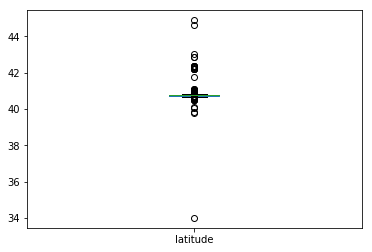

In [24]:
lats.plot(kind='box')

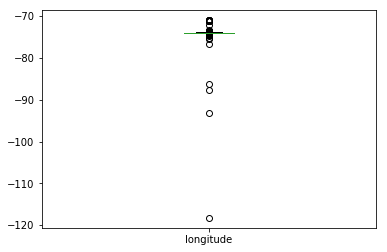

In [25]:
lons.plot(kind='box')

From the boxplots, the median latitude is ~41 degrees N, and the median latitude is ~74 degrees W. This is consistent with the real coordinates. However, there are many outliers that fall completely outside of the State of New York or relatively far from New York City. These are the outliers that we think are too far from the area we would like to analyze (New York City) for the purpose of this dataset, with the conditions being latitude values < 40.5 or > 42, as well as longitude values < -74.1.

In [26]:
outlier_lats = train_df[(train_df['latitude'] < 40.5) | (train_df['latitude'] > 42)| (train_df['longitude'] < -74.1) | (train_df['longitude'] > -73.7)]

# outlier_lats
outlier_lats.sort_values('latitude')

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
39798,1.0,1,117aceb94c48bfd1f3066a22f999705f,2016-06-17 02:10:25,NO FEE 1 bedroom - Great Elevator - Laundry B...,"E 38th St,","[Elevator, Walk in Closet(s), High Ceilings, H...",34.0126,7174857,-118.2710,f19288238987b18a693e16ee23720c20,[https://photos.renthop.com/2/7174857_6d71b6e1...,2425,"234 E 38th St,",low
121891,1.0,1,ebdf422b8605d69a719a5cdc34019463,2016-04-09 12:36:21,NEW BUILDING!!\rLarge 1BR Apt with private out...,505 Saint Marks Ave,"[Common Outdoor Space, Cats Allowed, Private O...",39.7996,6850473,-74.6248,4c2a031c5886dd6ca7085f3300dc7cb6,[https://photos.renthop.com/2/6850473_1a7356aa...,2550,505 Saint Marks Ave,low
104822,1.0,0,437454e6d44ae7c94f60b1b6507d084a,2016-04-16 02:10:48,NEWLY RENOVATED BEAUTIFUL SPACIOUS HUGE STUDIO...,"E 46th St,","[Doorman, Elevator, Walk in Closet(s), High Ce...",39.8395,6881361,-86.1527,8439c2c1ab6949a7447b00971e2f73a9,[https://photos.renthop.com/2/6881361_f8efe79e...,2650,"235 E 46th St,",low
114028,1.0,1,6869a3c2a96003e9992d6cd1c3c4b299,2016-04-07 01:41:55,Come for the studio apartment but stay for all...,Modern Studio in Amenity Filled 24 Hr. DM Bldg.,"[Cats Allowed, Dogs Allowed, Doorman, Elevator...",40.0450,6836479,-75.5214,c3b7c269756b10a84641f04868f30db1,[https://photos.renthop.com/2/6836479_2a5daff5...,2895,271 West 47TH Street,low
108994,1.0,0,0,2016-04-03 17:08:55,"Sunny, spacious garden level studio apartment ...",268 Bainbridge Street,"[Common Outdoor Space, Private Outdoor Space, ...",40.1159,6819739,-74.6267,8e75480baef379386edc3880bba576fd,[https://photos.renthop.com/2/6819739_79b1aee8...,1650,268 Bainbridge Street,low
66032,2.0,2,1b8a8f17bc71ce4901b03aa2faee0250,2016-05-05 02:39:45,Beautiful 2BR in the Washington Heights<p><a ...,W 163 Street,[Elevator],40.5065,6967155,-74.2432,2b6d9435a0e6c4019e5ffcb53389c3dd,[https://photos.renthop.com/2/6967155_870734b2...,3000,540 W 163 Street,low
82709,2.0,2,1b8a8f17bc71ce4901b03aa2faee0250,2016-05-10 02:30:46,"Awesome 2bed/2baths apartment just for $3.000,...",W 163 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.5065,6988269,-74.2432,abba62a6a83113e947f0b38a79e3c98b,[],3000,540 W 163 Street,low
41067,1.0,0,78161d4bf7933c307f5a4ee7cabb95e9,2016-06-01 15:42:54,"The Harrison offers studios, 1 bedroom and two...",575 Easton Avenue,"[Balcony, Dishwasher, No Fee, Elevator, Fitnes...",40.5065,7094306,-74.4708,e5808a5e6cc13988fe596704428d38d5,[https://photos.renthop.com/2/7094306_fe72e56d...,1310,575 Easton Avenue,medium
65759,2.0,2,1b8a8f17bc71ce4901b03aa2faee0250,2016-05-13 02:21:48,"Awesome 2bed/2baths apartment just for $3.000,...",W 163 Street,"[Elevator, Dishwasher, Hardwood Floors]",40.5065,7004652,-74.2432,460d813aef3f598dabf7e312e0eb373a,[https://photos.renthop.com/2/7004652_a9fe0fd9...,3000,540 W 163 Street,low
90453,1.0,0,bcff5fea2aa8b4bcc912e8ed3d25d6a4,2016-04-09 23:14:06,No fee! There's no need to look any further fo...,East 28th and Lexington Ave,"[Common Outdoor Space, Laundry In Unit, Cats A...",40.5813,6850662,-74.5343,aed64017aab5211439e8a6998f52f73b,[https://photos.renthop.com/2/6850662_5cf4238c...,3985,50 East 28th,low


In [27]:
# Print coordinates (negative value for longtitude implies West)
print(train_df[train_df.latitude == 34.0126]['latitude'].values[0], 
      train_df[train_df.latitude == 34.0126]['longitude'].values[0])

34.0126 -118.271


For example, when this coordinate is searched on Google Maps, the result is a location in the city of Los Angeles, California. We decide to remove this value, because a single datapoint for Los Angeles will not help us make predictions for New York, along with other outliers.

In [28]:
# delete rows
# train_df = train_df.drop([39798])
train_df = train_df.drop(train_df[(train_df['latitude'] < 40.5)|(train_df['latitude'] > 42)|(train_df['longitude'] < -74.1) | (train_df['longitude'] > -73.7)].index)

In [29]:
# Confirm the rows were deleted
# train_df[train_df.latitude == 34.0126].shape[0]
outlier_lats = len(train_df[(train_df['latitude'] < 40.5)| (train_df['longitude'] < -74.1)])
outlier_lats

0

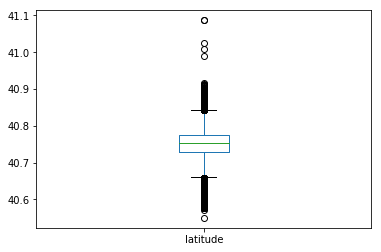

In [30]:
train_df['latitude'].plot(kind='box')

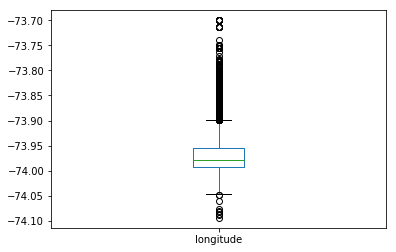

In [31]:
train_df['longitude'].plot(kind='box')

## Bathrooms

In [32]:
baths = train_df[['bathrooms']]

baths.sort_values('bathrooms')

,bathrooms
14242,0.0
85929,0.0
26433,0.0
8067,0.0
69229,0.0
...,...
79611,6.0
13701,6.0
91709,6.0
84566,7.0


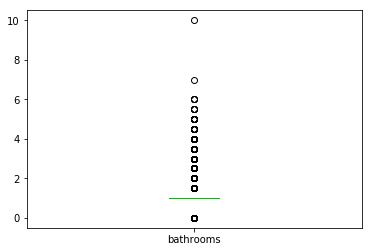

In [33]:
baths.plot(kind='box')

It is slightly unusual that some bathroom values are 0. Since virtually all apartments have at least one bathroom, we must treat these as missing values.

As for outliers, there appears to be at least one apartment with 10 bathrooms.

In [34]:
missing_baths = len(train_df[(train_df['bathrooms'].isnull()) | (train_df['bathrooms']==0)])

missing_baths

312

In [35]:
missing_vals['bathrooms'] = missing_baths

We decide to impute bathroom values of 0 to mode of bathroom, since mean and median may not be appropriate.

In [36]:
bath_mode = baths.mode().values[0][0]

In [37]:
bath_mode

1.0

In [38]:
train_df.loc[train_df['bathrooms'] == 0, 'bathrooms'] = bath_mode

In [39]:
train_df.sort_values(by='bathrooms')

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
4,1.0,1,8579a0b0d54db803821a35a4a615e97a,2016-06-16 05:55:27,Spacious 1 Bedroom 1 Bathroom in Williamsburg!...,145 Borinquen Place,"[Dining Room, Pre-War, Laundry in Building, Di...",40.7108,7170325,-73.9539,a10db4590843d78c784171a107bdacb4,[https://photos.renthop.com/2/7170325_3bb5ac84...,2400,145 Borinquen Place,medium
78269,1.0,1,5c692011a98ea9075adc5e2cb4bc2553,2016-05-24 02:57:13,This prestigious large newly renovated sun dre...,West 114th Street,"[Pre-War, No Fee]",40.8031,7058463,-73.9570,01157144534c928d731696e57ae4cd09,[https://photos.renthop.com/2/7058463_922fb857...,2500,302 West 114th Street,medium
78270,1.0,2,51ba2c2273e09893ad273c6ec11d0e8a,2016-05-06 02:19:37,2 Bd / 1 Ba - Brand new elevator/roof top caba...,North 4th Street,"[Dogs Allowed, Cats Allowed]",40.7174,6972833,-73.9617,d647e87c11d60b7aab9bffadf3df5116,[https://photos.renthop.com/2/6972833_42d7caf7...,4450,76 North 4th Street,low
78274,1.0,0,7f2663e2c48d5ffa57276bf2186c4680,2016-05-22 04:57:40,** NO FEE **Gut renovated studio apartment wit...,East 76th Street,"[Dishwasher, No Fee, Cats Allowed, Dogs Allowed]",40.7708,7053064,-73.9556,e2aa71ea7e46aa975a6cefa35f64d28b,[https://photos.renthop.com/2/7053064_5a9d16c5...,2400,342 East 76th Street,medium
78276,1.0,1,eca4875bbe5e838b7ec20d75d108806a,2016-05-19 02:14:46,Welcome to Clinton Hill Contact Me for More In...,154a Washington Ave,"[Duplex, Common parking/Garage, Common roof de...",40.6940,7035769,-73.9672,6d9b4949574486ce2cba1ec127ec3459,[https://photos.renthop.com/2/7035769_a99d0468...,2200,154A Washington Ave,high
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30788,6.0,5,1c2f695696013f4068f89619d06b174f,2016-06-01 02:14:51,"<BR>Home in the sky. One-of-a-kind, 5 Bedrooms...",East 60th Street,"[Doorman, Elevator, Laundry in Unit, Dogs Allo...",40.7603,7088146,-73.9610,161a1a797a1e57f6ba979447a0eadf94,[https://photos.renthop.com/2/7088146_9c0380cd...,28000,401 East 60th Street,low
91709,6.0,6,d20bce0bc08b2731f726067a1e501162,2016-04-16 02:22:15,MANSION IN THE SKY!!! This six-bedroom full-fl...,230 West 56th Street,"[Doorman, Elevator, Furnished, Laundry in Unit...",40.7654,6881666,-73.9822,37ffeac28297e956deecd7b31940c6e7,[https://photos.renthop.com/2/6881666_bedcd181...,100000,230 West 56th Street,low
79611,6.0,5,1c2f695696013f4068f89619d06b174f,2016-05-02 02:12:06,"<BR>Home in the sky. One-of-a-kind, 5 Bedrooms...",East 60th Street,"[Doorman, Elevator, Laundry in Unit, Dogs Allo...",40.7603,6952330,-73.9610,c8e5586edfdb8fd3cdc6f9c3a9bf4678,[https://photos.renthop.com/2/6952330_ca372c6f...,28000,401 East 60th Street,low
84566,7.0,5,0,2016-04-07 17:06:29,Extraordinary in every way. This single family...,West 9th St- High Class Townhome,[],40.7335,6840943,-73.9974,e6472c7237327dd3903b3d6f6a94515a,[https://photos.renthop.com/2/6840943_7f4b82cf...,60000,47th West 9th St,low


We look into more detail the apartment with 10 bathrooms.

In [40]:
train_df[train_df['bathrooms'] >= 10]

,bathrooms,bedrooms,building_id,created,description,display_address,features,latitude,listing_id,longitude,manager_id,photos,price,street_address,interest_level
104459,10.0,2,424f8014bddc288d26da5fe81d0bea02,2016-04-09 04:34:31,***The building?s well-attended lobby welcomes...,W 52 St.,"[Doorman, Elevator, Fitness Center, Laundry in...",40.7633,6849204,-73.9849,0c71a59cb70215fbf49c9dd93efaa172,[https://photos.renthop.com/2/6849204_1f92b58a...,3600,260 W 52 St.,low


In [41]:
train_df[train_df['bathrooms'] >= 10]['description'].iloc[0]

'***The building?s well-attended lobby welcomes the residents with its 24-hour doorman and concierge service as well as a fitness center, private storage rooms, bicycle storage, sauna and a laundry area on every floor. Many units have been completely renovated with beautiful new finishes, stone countertops and GE stainless steel appliances. Enjoy the Broadway theater district, Times Square, Central Park and exceptional dining and shopping<br /><br />***HUGE AS BIG AS A FOOT BALL FIELD AND FEATURES HIGH CEILING ,BRAND NEW KITCHEN ,MARBLE BATHROOM, TONS OF CLOSET SPACE ,UNOBSTRUCTED CITY VIEWS AND A TON OF LIGHT DUE TO ITS EXPOSURE AND HIGH FLOOR<br /><br />***TO SET UP TIME AND LOCATION CONTACT RUBENS 039-610-8860<br /><br /><p><a  website_redacted '

In the description a **MARBLE BATHROOM** is described. Based on this description, it's very likely that 10.0 was just a typo for 1.0. Thus, we replace this value to the more likely value of 1.

In [42]:
train_df.loc[104459, 'bathrooms'] = 1.0

Thus, the bathroom value of 10.0 was not an actual outlier but merely a typo. Therefore, we set the outlier count to 0.

In [43]:
outlier_count['bathrooms'] = 0

## Bedrooms

Unlike bathrooms, it is perfectly normal for apartments to have zero bedrooms, especially studios. Thus we will not treat values of 0 as 'missing'.

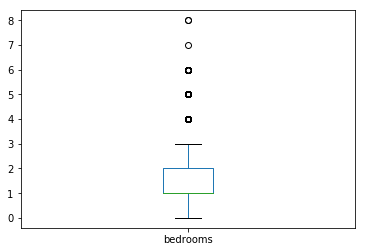

In [44]:
beds = train_df['bedrooms']
beds.plot(kind='box')

In [45]:
missing_beds = len(train_df[(train_df['bedrooms'].isnull())])

missing_beds

0

In [46]:
missing_vals['bedrooms'] = missing_beds

There doesn't appear to be any outliers in the number of bedrooms.

In [47]:
outlier_count['bedrooms'] = 0

## Features

In [48]:
train_df['features'].head()

4     [Dining Room, Pre-War, Laundry in Building, Di...
6     [Doorman, Elevator, Laundry in Building, Dishw...
9     [Doorman, Elevator, Laundry in Building, Laund...
10                                                   []
15    [Doorman, Elevator, Fitness Center, Laundry in...
Name: features, dtype: object

In [49]:
missing_features = len(train_df[train_df['features'].map(lambda d: len(d)) == 0])

missing_features

3212

In [50]:
missing_vals['features'] = missing_features

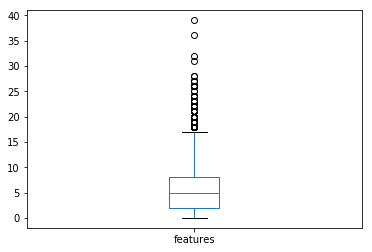

In [51]:
feature_dist = train_df['features'].map(lambda d: len(d))
feature_dist.plot(kind='box')

Based on the boxplot, it does not look like any listing in particular has an unusually large quantity of feature.

In [52]:
outlier_count['features'] = 0

## Description

In [53]:
missing_description = len(train_df[train_df['description'].map(lambda d: len(d)) == 0])

missing_description

1445

In [54]:
missing_vals['description'] = missing_description

In [55]:
outlier_count['description'] = 0

## Display Address

In [56]:
missing_address = len(train_df[train_df['display_address'].map(lambda d: len(d)) == 0])

missing_address

135

In [57]:
missing_vals['display_address'] = missing_address

In [58]:
outlier_count['display_address'] = 0

## Street address

Street addresses are strings, so we count the number of empty strings.

In [59]:
missing_stAddress = len(train_df[train_df['street_address'].map(lambda d: len(d)) == 0])

missing_stAddress

10

In [60]:
missing_vals['street_address'] = missing_stAddress

Note: we do not consider any of the non-missing addresses as possible outliers, as latitude/longitude already define the precise location of the apartment.

In [61]:
outlier_count['street_address'] = 0

## Photos

Let's take a look at the 'Photos' attribute.

In [62]:
train_df['photos'].head()

4     [https://photos.renthop.com/2/7170325_3bb5ac84...
6     [https://photos.renthop.com/2/7092344_7663c19a...
9     [https://photos.renthop.com/2/7158677_c897a134...
10    [https://photos.renthop.com/2/7211212_1ed4542e...
15    [https://photos.renthop.com/2/7225292_901f1984...
Name: photos, dtype: object

In [63]:
train_df['photos'].iloc[0]

['https://photos.renthop.com/2/7170325_3bb5ac84a5a10227b17b273e79bd77b4.jpg',
 'https://photos.renthop.com/2/7170325_a29a17a771ee6af213966699b05c8ea2.jpg',
 'https://photos.renthop.com/2/7170325_149a898e8760cac1cad56e30cfe98baa.jpg',
 'https://photos.renthop.com/2/7170325_f74a43d781bcc3c5588e61dd47de81ba.jpg',
 'https://photos.renthop.com/2/7170325_e677d9d249ac99abe01aa5454c6e9f59.jpg',
 'https://photos.renthop.com/2/7170325_960ea0e180bf2f15467b68b455db6172.jpg',
 'https://photos.renthop.com/2/7170325_cbc1b8437155dbf7f5d63b3a0b5a45a3.jpg',
 'https://photos.renthop.com/2/7170325_9a9f2adc2ce922e1d5394727efdf64bb.jpg',
 'https://photos.renthop.com/2/7170325_aae2a39d536103eebb282775fab1c315.jpg',
 'https://photos.renthop.com/2/7170325_cd290d0051b9f08e3482195dcbf6b5a6.jpg',
 'https://photos.renthop.com/2/7170325_a2b599da7880eea1edd10c4b04250dc1.jpg',
 'https://photos.renthop.com/2/7170325_6b83fa82d662bcb09733ac3a8a107113.jpg']

Each value is an array of photo URLs. Missing values would therefore then be empty arrays.

In [64]:
missing_photos= len(train_df[train_df['photos'].map(lambda d: len(d)) == 0])

missing_photos

3613

In [65]:
missing_vals['photos'] = missing_photos

In [66]:
photo_count = train_df['photos'].map(lambda d: len(d))

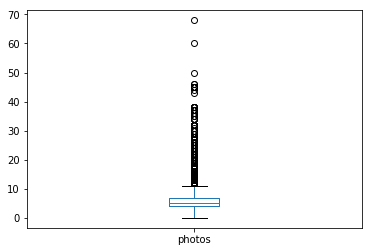

In [67]:
photo_count.plot(kind='box')

There are some listing that are well beyond 50. We will define those to be the outliers.

In [68]:
outlier_count['photos'] = len(photo_count[photo_count > 50])

outlier_count['photos']

2

## Building Id

Let's look at building id and see what kind of data type it is.

In [69]:
train_df['building_id'].head()

4     8579a0b0d54db803821a35a4a615e97a
6     b8e75fc949a6cd8225b455648a951712
9     cd759a988b8f23924b5a2058d5ab2b49
10    53a5b119ba8f7b61d4e010512e0dfc85
15    bfb9405149bfff42a92980b594c28234
Name: building_id, dtype: object

In [70]:
train_df['building_id'].iloc[0]

'8579a0b0d54db803821a35a4a615e97a'

Each id is an alphanumeric string. It appears that the id's are same length. Perhaps missing values are the empty string, or the string '0'.

In [71]:
building_id_len = len('8579a0b0d54db803821a35a4a615e97a')
missing_buildingid_df = train_df[train_df['building_id'].str.len() < building_id_len]['building_id']

In [72]:
missing_buildingid_df

61        0
82        0
106       0
117       0
139       0
         ..
123982    0
123985    0
123986    0
123995    0
123998    0
Name: building_id, Length: 8283, dtype: object

We observe that the missing values are represented as the zero string, aka "0". Now we take the final count.

In [73]:
missing_buildid= len(missing_buildingid_df)

missing_buildid

8283

In [74]:
missing_vals['building_id'] = missing_buildid

Note: outliers are not applicable for building ID as building ID is simply a unique identifier.

In [75]:
outlier_count['building_id'] = 0

## Manager ID

In [76]:
train_df['manager_id'].head()

4     a10db4590843d78c784171a107bdacb4
6     955db33477af4f40004820b4aed804a0
9     c8b10a317b766204f08e613cef4ce7a0
10    5ba989232d0489da1b5f2c45f6688adc
15    2c3b41f588fbb5234d8a1e885a436cfa
Name: manager_id, dtype: object

We shall assume that manager ID follows the same format as building ID, and that missing manager IDs will be represented as the '0' string.

In [77]:
missing_managerid = len(train_df[train_df['manager_id'] == '0'])
missing_managerid

0

In [78]:
missing_vals['manager_id'] = missing_managerid

In [79]:
outlier_count['manager_id'] = 0

## Listing ID

In [80]:
train_df['listing_id'].head()

4     7170325
6     7092344
9     7158677
10    7211212
15    7225292
Name: listing_id, dtype: int64

The Listing ID is different from Building ID and Manager ID. Likely it is just the primary key, and starts from 1 and increases. Nevertheless, let's check for missing values.

In [81]:
missing_listingid = len(train_df[train_df['listing_id'] < 0])
missing_listingid

0

In [82]:
missing_vals['listing_id'] = missing_listingid

Outliers are not applicable for the Listing ID attribute.

In [83]:
outlier_count['listing_id'] = 0

## Created

The 'created' attribute is a timestamp that indicates the creation time of the listing.

In [84]:
created_df = train_df['created']

In [85]:
created_df.head()

4     2016-06-16 05:55:27
6     2016-06-01 05:44:33
9     2016-06-14 15:19:59
10    2016-06-24 07:54:24
15    2016-06-28 03:50:23
Name: created, dtype: object

In [86]:
type(created_df.iloc[0])

str

The timestamps are strings. Let's find how many missing creation timestamps there are.

In [87]:
missing_created = len(train_df[train_df['created'].map(lambda d: len(d)) == 0])

In [88]:
missing_created

0

In [89]:
missing_vals['created'] = missing_created

Thus, every single listing has a creation time, as expected. Now we can parse the timestamps, and plot them to notice if there are any outliers.

In [90]:
from datetime import datetime

Format is as follows: YYYY-MM-DD HH:MM:SS (where HH ranges from 0 to 23)

In [91]:
datetime_format = '%Y-%m-%d %H-%M-%S'

In [92]:
created_time_df = pd.to_datetime(created_df)

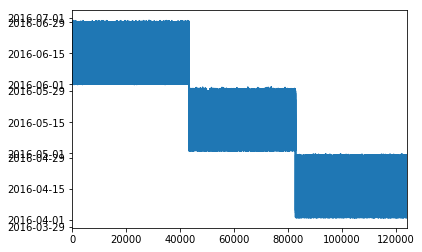

In [93]:
created_time_df.plot()

From the plot, it appears that the timestamps are roughly split evenly between 3 months.

In [94]:
outlier_count['created'] = 0

## Interest Level

In [95]:
missing_interest= len(train_df[train_df['interest_level'].isnull()])

missing_interest

0

In [96]:
train_df.interest_level.unique()

array(['medium', 'low', 'high'], dtype=object)

There are appears to be no missing values or inconsistent input for interest levels.